In [1]:
#!pip install scipy
#!pip install openpyxl

In [2]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
# reading dataset
data1=pd.read_excel(r"C:\Users\PC\anaconda3\envs\new_env_pbi2\hotel_revenue_historical_full.xlsx",sheet_name="2018")
data2=pd.read_excel(r"C:\Users\PC\anaconda3\envs\new_env_pbi2\hotel_revenue_historical_full.xlsx",sheet_name="2019")
data3=pd.read_excel(r"C:\Users\PC\anaconda3\envs\new_env_pbi2\hotel_revenue_historical_full.xlsx",sheet_name="2020")
df=pd.concat([data1,data2,data3],ignore_index=True)

In [4]:
# Showing Data
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2018-06-23
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2018-05-11
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2018-05-29


In [5]:
# checking Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
# checking "is_canceled" for total number of canceled booking shown as 1
df["is_canceled"].value_counts()

is_canceled
0    89108
1    52839
Name: count, dtype: int64

##### It is shown that total number of canceled booking are  52839, and total number of booking which is not canceled are 89108

In [7]:
# Removing All canceled data
filter_df= df[df["is_canceled"]!=1]
# Save in a csv file named as "hotel_revenue_historical_full.csv"
filter_df.to_csv("hotel_revenue_historical_full.csv")

C:\Users\PC\anaconda3\envs\new_env_pbi2\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


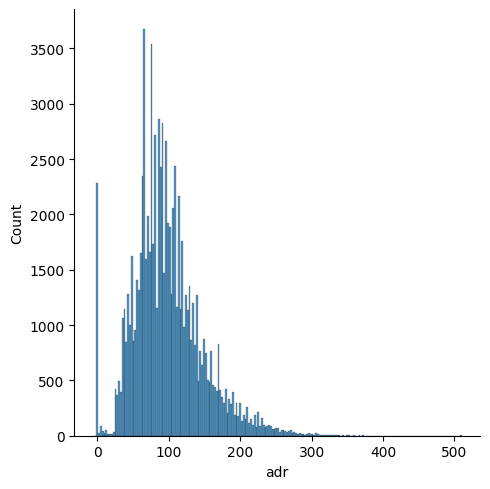

In [8]:
# Univariate and Bivariate Analysis
sns.displot(filter_df["adr"])

In [9]:
filter_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
filter_df["hotel"].value_counts()

hotel
City Hotel      53994
Resort Hotel    35114
Name: count, dtype: int64

C:\Users\PC\AppData\Local\Temp\ipykernel_1576\1888587852.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filter_df[filter_df["hotel"]=="City Hotel"]["adr"],label="City Hotel")
C:\Users\PC\AppData\Local\Temp\ipykernel_1576\1888587852.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filter_

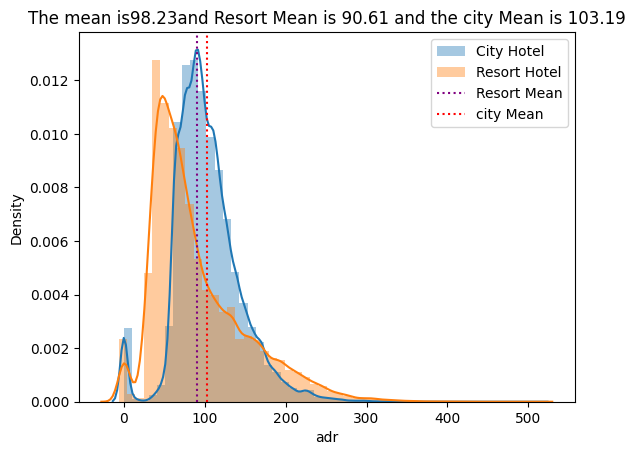

In [11]:
sns.distplot(filter_df[filter_df["hotel"]=="City Hotel"]["adr"],label="City Hotel")
sns.distplot(filter_df[filter_df["hotel"]=="Resort Hotel"]["adr"],label="Resort Hotel")
resort_mean=filter_df[filter_df["hotel"]=="Resort Hotel"]["adr"].mean()
city_mean =filter_df[filter_df["hotel"]=="City Hotel"]["adr"].mean()
plt.axvline(resort_mean,color="purple",linestyle=":",label="Resort Mean")
plt.axvline(city_mean,color="red",linestyle=":",label="city Mean")
plt.title(f'The mean is{filter_df["adr"].mean():.2f}and Resort Mean is {resort_mean:.2f} and the city Mean is {city_mean:.2f}')
plt.legend()
plt.savefig("ADR_Distribution.png")


Text(0.5, 1.0, 'The mean is 76.89 and Resort Mean is 77.11 and the City Mean is 76.75')

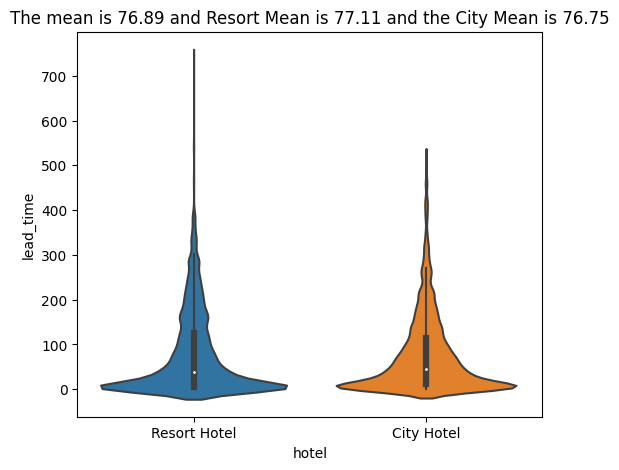

In [21]:
plt.figure(figsize=(6,5))
sns.violinplot(data=filter_df,y="lead_time",x="hotel")
resort_mean=filter_df[filter_df["hotel"]=="Resort Hotel"]["lead_time"].mean()
city_mean=filter_df[filter_df["hotel"]=="City Hotel"]["lead_time"].mean()
plt.title(f'The mean is {filter_df["lead_time"].mean():.2f} and Resort Mean is {resort_mean:.2f} and the City Mean is {city_mean:.2f}')

<Axes: xlabel='lead_time', ylabel='adr'>

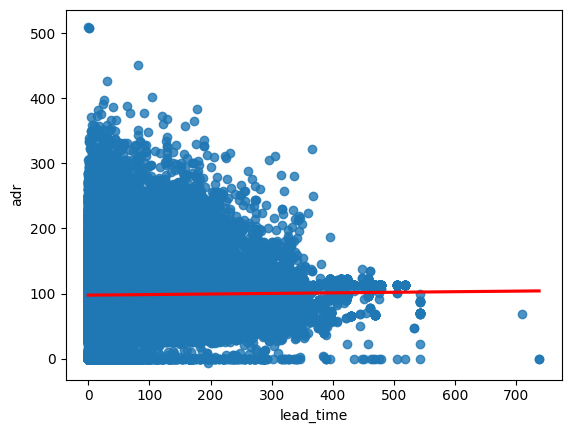

In [13]:
# Bivariate Analysis and Linear Regression
sns.regplot(data=filter_df,y="adr",x="lead_time",line_kws={"color":"red"})

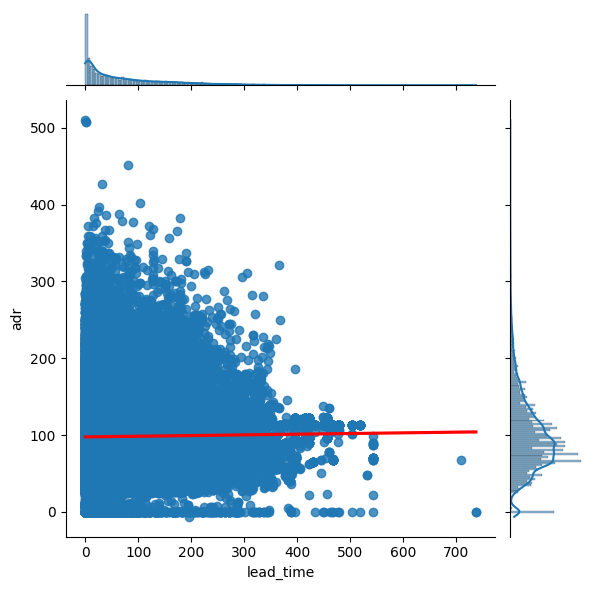

In [14]:
sns.jointplot(data=filter_df,y="adr",x="lead_time",kind='reg',joint_kws={"line_kws":{"color":"red"}})

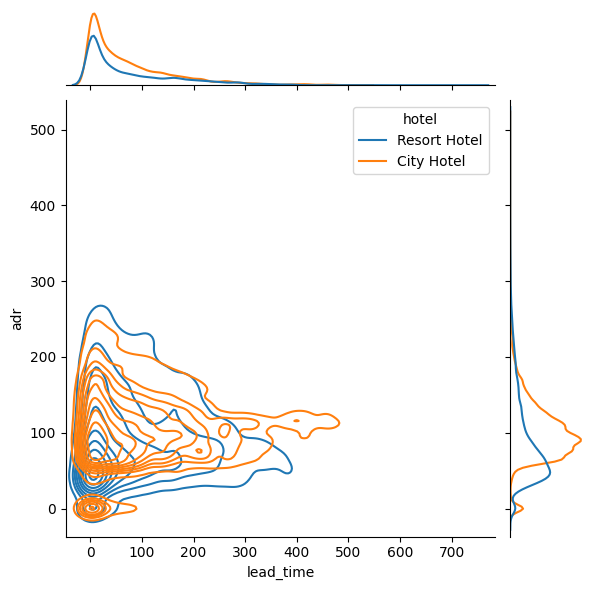

In [15]:
sns.jointplot(data=filter_df,y="adr",x="lead_time",kind="kde",hue="hotel")

In [16]:
# Linear Regression
linregress(filter_df["lead_time"],filter_df["adr"])

LinregressResult(slope=0.008855843930593446, intercept=97.54811713144225, rvalue=0.016122313985460043, pvalue=1.4874734271358465e-06, stderr=0.001839893371979956, intercept_stderr=0.215970006450331)

In [17]:
# Linear Regression
slope= linregress(filter_df["lead_time"],filter_df["adr"])[0]
intercept= linregress(filter_df["lead_time"],filter_df["adr"])[1]
r2=linregress(filter_df["lead_time"],filter_df["adr"])[2]
regression_table=pd.DataFrame({"Name":["slope","intercept","r2"],"values":[slope,intercept,r2]})
regression_table

,Name,values
0,slope,0.008856
1,intercept,97.548117
2,r2,0.016122
